<a href="https://colab.research.google.com/github/dhanavel2021/RF-Classifier/blob/main/Taxi_Fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd


In [73]:
data=pd.read_csv("/content/TaxiFare.csv")

In [74]:
data

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [75]:
data.corr()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


In [76]:
data.info()
df=data.drop(["date_time_of_pickup","unique_id"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [77]:
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2


In [78]:
x=df.drop(["amount"],axis=1)
y=df["amount"]

In [79]:
from sklearn.model_selection import train_test_split as tts

In [80]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30,random_state=0)

In [81]:
from sklearn.ensemble import RandomForestRegressor
m=RandomForestRegressor()

In [82]:
m.fit(xtrain,ytrain)

RandomForestRegressor()

In [83]:
rr=m.predict(xtrain)
r=m.predict(xtest)

In [84]:
from sklearn.metrics import r2_score,mean_squared_error

In [85]:
r2_score(ytrain,rr)

0.9424573347804943

In [86]:
r2_score(ytest,r)

0.7364827054750205

In [87]:
mean_squared_error(ytrain,rr)

5.540619645997153

In [88]:
mean_squared_error(ytest,r)

23.191146218268262

In [89]:
import matplotlib.pyplot as plt


(array([4.1302e+04, 6.9900e+03, 1.2680e+03, 3.8700e+02, 3.5000e+01,
        6.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ -5. ,  15.5,  36. ,  56.5,  77. ,  97.5, 118. , 138.5, 159. ,
        179.5, 200. ]),
 <a list of 10 Patch objects>)

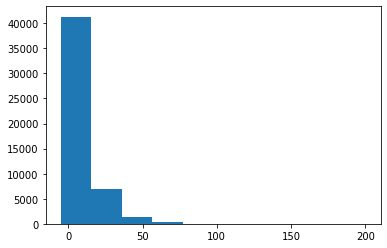

In [90]:
plt.hist(df["amount"])